# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
    
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(pd.unique(mouse_study_df['Mouse ID']))
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_grouped = mouse_study_df.groupby(["Mouse ID"]).agg({"Timepoint":"count"})
mouse_find = mouse_grouped.loc[mouse_grouped["Timepoint"] > 10]

mouse_find

,Timepoint
Mouse ID,
g989,13


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = len(pd.unique(mouse_study_clean['Mouse ID']))
mouse_clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
regimen_med = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
regimen_var = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
regimen_std = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
regimen_sem = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
regimen_sum1 = pd.merge(regimen_mean, regimen_med, on = "Drug Regimen").rename(
    columns ={'Tumor Volume (mm3)_x':'Mean Tumor Volume', 'Tumor Volume (mm3)_y':'Median Tumor Volume'})
regimen_sum2 = pd.merge(regimen_sum1, regimen_var, on = "Drug Regimen").rename(
    columns ={'Tumor Volume (mm3)':'Tumor Volume Variance'})
regimen_sum3 = pd.merge(regimen_sum2, regimen_std, on = "Drug Regimen").rename(
    columns ={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
regimen_summary = pd.merge(regimen_sum3, regimen_sem, on = "Drug Regimen").rename(
    columns ={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary2 = mouse_study_clean.groupby(["Drug Regimen"]).agg(
    {"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]}).rename(
    columns ={'mean':'Mean Tumor Volume', 'median':'Median Tumor Volume', 'var':'Tumor Volume Variance', 
              'std':'Tumor Volume Std. Dev.', 'sem':'Tumor Volume Std. Err.'})
regimen_summary2

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

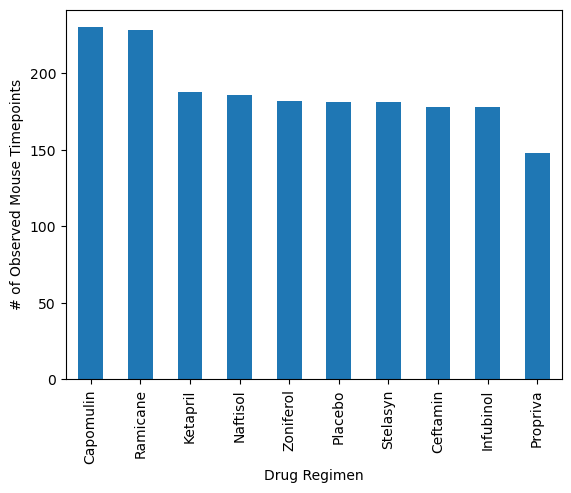

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_count = mouse_study_clean.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)

timepoints_plot = timepoints_count.plot.bar(x="Drug Regimen", ylabel="# of Observed Mouse Timepoints", legend = False)
timepoints_plot


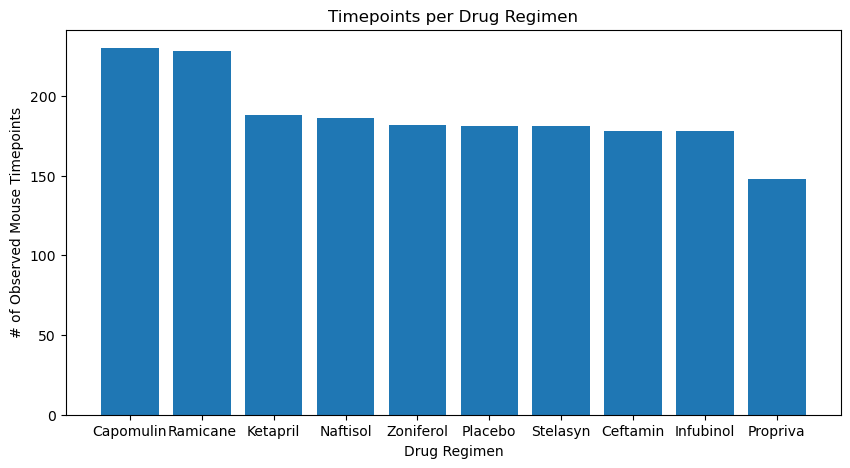

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#reset the index to a column
timepoints_count = timepoints_count.reset_index()

#create x and y variables
regimen = timepoints_count["Drug Regimen"]
count = timepoints_count["Timepoint"]

#create the plot
plt.figure(figsize = (10,5))
plt.bar(regimen, count)
     
# giving title to the plot
plt.title("Timepoints per Drug Regimen")

# giving X and Y labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# visualizing the plot
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# create the dataset
mouse_gender = mouse_study_clean.groupby(["Sex"])["Mouse ID"].unique()
mouse_female = len(mouse_gender["Female"])
mouse_male = len(mouse_gender["Male"])
#check the number of mice adds properly
mouse_female + mouse_male == mouse_clean_count

True

In [12]:
# create percentages
male_perc = mouse_male / mouse_clean_count
female_perc = mouse_female / mouse_clean_count

Text(0.5, 1.0, 'Sex Distribution')

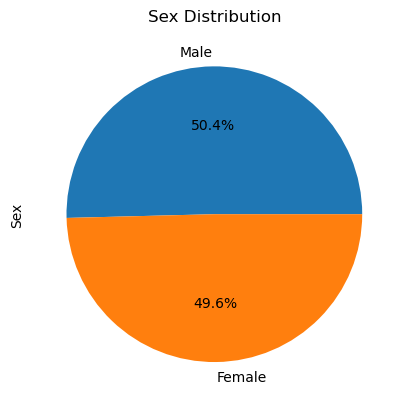

In [13]:
mouse_gender_df = pd.DataFrame({"Sex": [male_perc, female_perc]}, index=['Male', 'Female'])
gender_count = mouse_gender_df.plot.pie(y="Sex", legend = False, autopct='%1.1f%%')
gender_count.set_title("Sex Distribution")


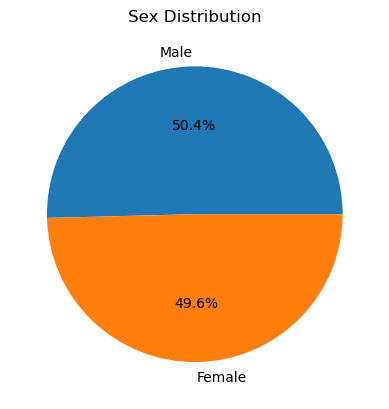

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_perc, female_perc]

#create the plot
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Sex Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max = mouse_study_clean.groupby(["Mouse ID"]).agg({"Timepoint":"max"})
mouse_max = mouse_max.reset_index()
#mouse_max

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_tumor = pd.merge(mouse_max, mouse_study_clean, how = "left", on = ['Mouse ID', 'Timepoint'])
mouse_tumor_reduced = mouse_tumor.loc[(mouse_tumor['Drug Regimen'] == 'Capomulin') | 
                                      (mouse_tumor['Drug Regimen'] == 'Ramicane') |
                                      (mouse_tumor['Drug Regimen'] == 'Infubinol') |
                                      (mouse_tumor['Drug Regimen'] == 'Ceftamin')]
mouse_tumor_reduced = mouse_tumor_reduced.reset_index(drop = True)
mouse_tumor_reduced

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# group mice by Drug Regimen
capomulin_df = mouse_tumor.loc[(mouse_tumor['Drug Regimen'] == 'Capomulin')]
ramicane_df = mouse_tumor.loc[(mouse_tumor['Drug Regimen'] == 'Ramicane')]
infubinol_df = mouse_tumor.loc[(mouse_tumor['Drug Regimen'] == 'Infubinol')]
ceftamin_df = mouse_tumor.loc[(mouse_tumor['Drug Regimen'] == 'Ceftamin')]
capomulin_tumor = capomulin_df["Tumor Volume (mm3)"]
ramicane_tumor = ramicane_df["Tumor Volume (mm3)"]
infubinol_tumor = infubinol_df["Tumor Volume (mm3)"]
ceftamin_tumor = ceftamin_df["Tumor Volume (mm3)"]


In [18]:
# Determine outliers for each Drug Regimen using upper and lower bounds
capomulin_quartiles = capomulin_tumor.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_b = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_b = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_outliers = []
for tumor in capomulin_tumor:
    if tumor < capomulin_lower_b or tumor > capomulin_upper_b:
        capomulin_outliers.append(tumor)

ramicane_quartiles = ramicane_tumor.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_b = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_b = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_outliers = []
for tumor in ramicane_tumor:
    if tumor < ramicane_lower_b or tumor > ramicane_upper_b:
        ramicane_outliers.append(tumor)

infubinol_quartiles = infubinol_tumor.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_b = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_b = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_outliers = []
for tumor in infubinol_tumor:
    if tumor < infubinol_lower_b or tumor > infubinol_upper_b:
        infubinol_outliers.append(tumor)

ceftamin_quartiles = ceftamin_tumor.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_b = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_b = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_outliers = []
for tumor in ceftamin_tumor:
    if tumor < ceftamin_lower_b or tumor > ceftamin_upper_b:
        ceftamin_outliers.append(tumor)
print(f"Capomulin's upper bound is {capomulin_upper_b} and lower bound is {capomulin_lower_b}. " 
      f"These points may be ouliers: {capomulin_outliers}.")
print(f"Ramicane's upper bound is {ramicane_upper_b} and lower bound is {ramicane_lower_b}. " 
      f"These points may be ouliers: {ramicane_outliers}.")
print(f"Infubinol's upper bound is {infubinol_upper_b} and lower bound is {infubinol_lower_b}. " 
      f"These points may be ouliers: {infubinol_outliers}.")
print(f"Ceftamin's upper bound is {ceftamin_upper_b} and lower bound is {ceftamin_lower_b}. " 
      f"These points may be ouliers: {ceftamin_outliers}.")



Capomulin's upper bound is 51.83201549 and lower bound is 20.70456164999999. These points may be ouliers: [].
Ramicane's upper bound is 54.30681135 and lower bound is 17.912664470000003. These points may be ouliers: [].
Infubinol's upper bound is 82.74144559000001 and lower bound is 36.83290494999999. These points may be ouliers: [36.3213458].
Ceftamin's upper bound is 87.66645829999999 and lower bound is 25.355449580000002. These points may be ouliers: [].


C:\Users\jenni\AppData\Local\Temp\ipykernel_19060\2725189043.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


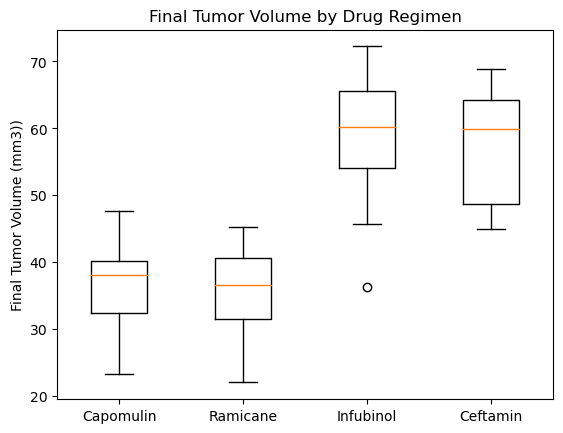

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3))')
ax1.set_xticklabels(treatments)
data = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create dataframe for mouse
capomulin_mouse = mouse_study_clean.loc[(mouse_study_clean["Mouse ID"] == "l509")]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


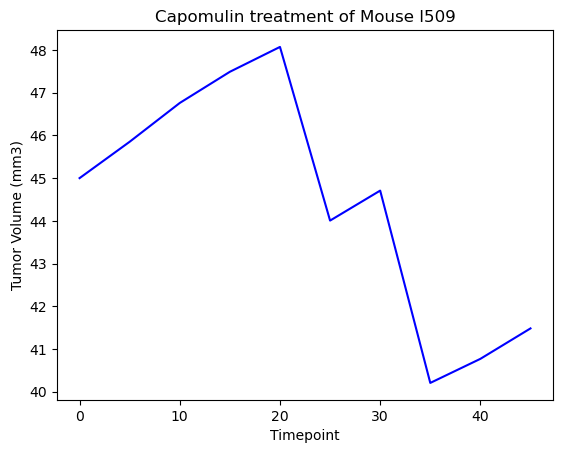

In [21]:
# Generate Plot
timepoint = capomulin_mouse["Timepoint"]
volume = capomulin_mouse["Tumor Volume (mm3)"]
capomulin_line = plt.plot(timepoint, volume, color="blue")
plt.title("Capomulin treatment of Mouse l509")
plt.xlabel("Timepoint") 
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Create dataframe
capomulin_weight = capomulin_df.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)":"mean", "Weight (g)":"mean"}).rename(
    columns ={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
capomulin_weight

,Average Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,38.982878,22.0
b742,38.939633,21.0
f966,30.485985,17.0
g288,37.074024,19.0
g316,40.159220,22.0
i557,47.685963,24.0
i738,37.311846,20.0
j119,38.125164,23.0
j246,38.753265,21.0


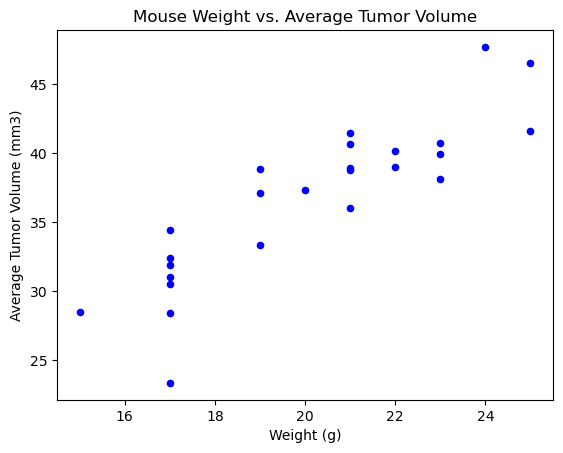

In [23]:
# Plot dataframe
capomulin_weight.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)", c='blue')
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.88


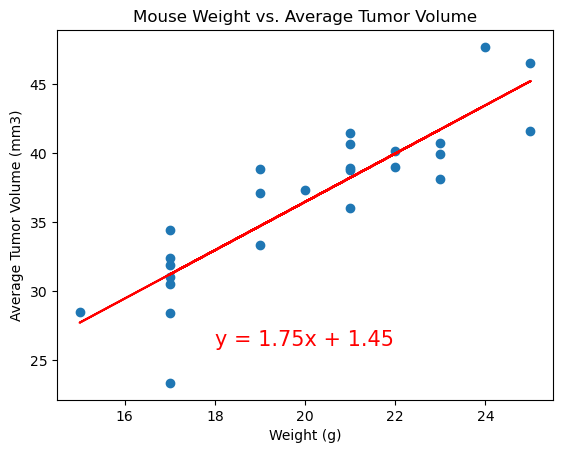

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_weight['Weight (g)']
y_values = capomulin_weight['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,26),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight vs. Average Tumor Volume")
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()